In [3]:
# -*- coding: utf-8 -*-
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from google.cloud import bigquery

#一時的にwarnings非表示に
import warnings
warnings.filterwarnings('ignore')

#マイライブラリー読込
#from mylib import *


# データの読み込み
train =pd.read_csv('gs://sample_machine_learning_input/HousePrices/train.csv')
test = pd.read_csv('gs://sample_machine_learning_input/HousePrices/test.csv')



In [4]:
# データタイプがobjectの列の値をラベル化した数値に変換
for i in range(train.shape[1]):
    if train.iloc[:,i].dtypes == object:
        lbl = LabelEncoder()
        lbl.fit(list(train.iloc[:,i].values) + list(test.iloc[:,i].values))
        train.iloc[:,i] = lbl.transform(list(train.iloc[:,i].values))
        test.iloc[:,i] = lbl.transform(list(test.iloc[:,i].values))

        
# Label Encodeされた後の、SaleConditionカラムにセットされている値の一覧
train["SaleCondition"].unique()

array([4, 0, 5, 1, 2, 3])

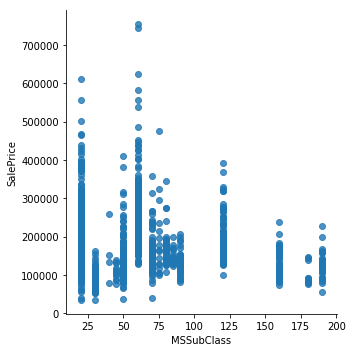

In [5]:
#各カラムと販売価格の関係
#建物クラス
sns.lmplot(x='MSSubClass',y='SalePrice',data=train,fit_reg=False)

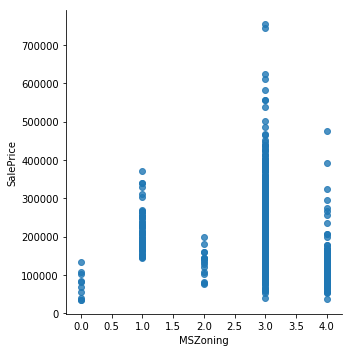

In [6]:
#一般的なゾーニング分類
sns.lmplot(x='MSZoning',y='SalePrice',data=train,fit_reg=False)

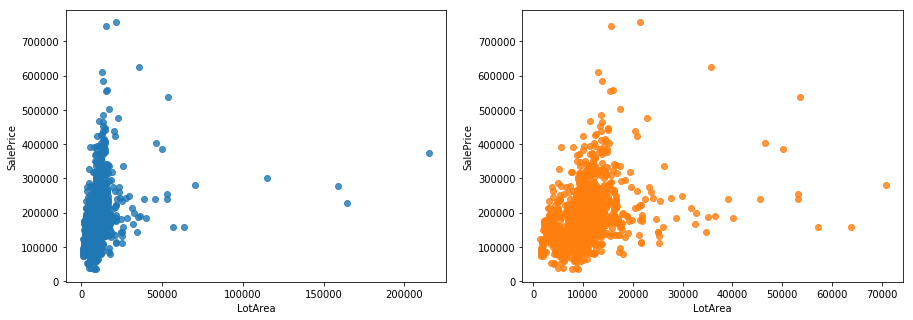

In [7]:
#ロットサイズ（平方フィート）
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.regplot(x='LotArea',y='SalePrice',data=train,fit_reg=False,ax=ax[0])

#外れデータ除外
train = train.drop(train[(train['LotArea']>100000)].index)
sns.regplot(x='LotArea',y='SalePrice',data=train,fit_reg=False,ax=ax[1])

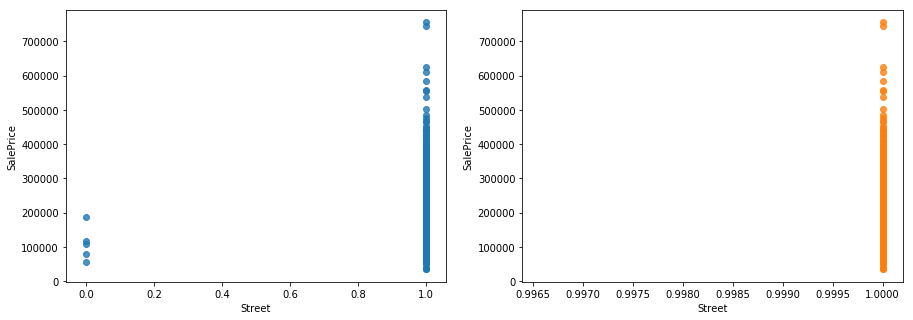

In [8]:
#道路アクセスの種類
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.regplot(x='Street',y='SalePrice',data=train,fit_reg=False,ax=ax[0])

#外れデータ除外
train = train.drop(train[(train['Street']<0.1)].index)
sns.regplot(x='Street',y='SalePrice',data=train,fit_reg=False,ax=ax[1])


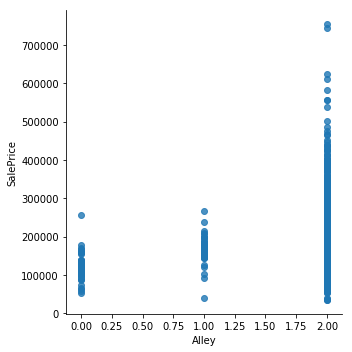

In [9]:
#路地アクセスの種類
sns.lmplot(x='Alley',y='SalePrice',data=train,fit_reg=False)

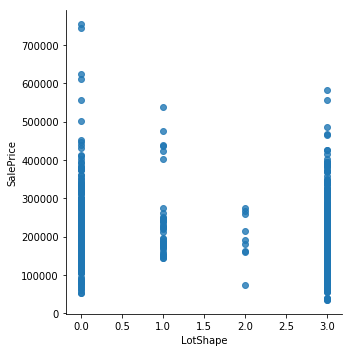

In [10]:
#資産の一般的な形状
sns.lmplot(x='LotShape',y='SalePrice',data=train,fit_reg=False)

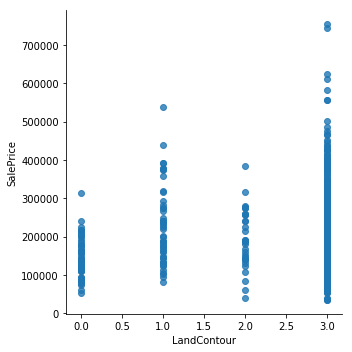

In [11]:
#物件の平坦度
sns.lmplot(x='LandContour',y='SalePrice',data=train,fit_reg=False)

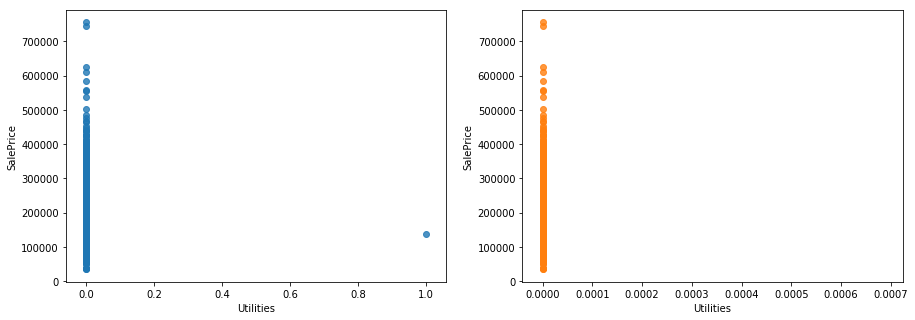

In [12]:
#利用可能なユーティリティの種類
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.regplot(x='Utilities',y='SalePrice',data=train,fit_reg=False,ax=ax[0])

#外れデータ除外
train = train.drop(train[(train['Utilities']>0.9)].index)
sns.regplot(x='Utilities',y='SalePrice',data=train,fit_reg=False,ax=ax[1])


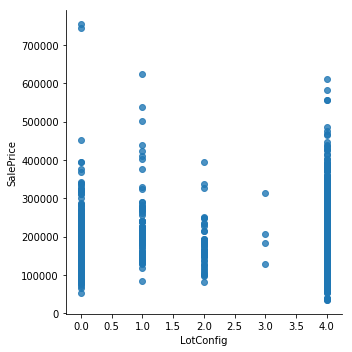

In [13]:
#ロット構成
sns.lmplot(x='LotConfig',y='SalePrice',data=train,fit_reg=False)

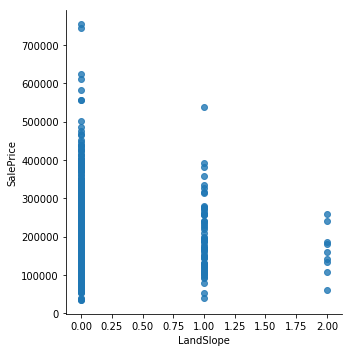

In [14]:
#土地の傾斜
sns.lmplot(x='LandSlope',y='SalePrice',data=train,fit_reg=False)

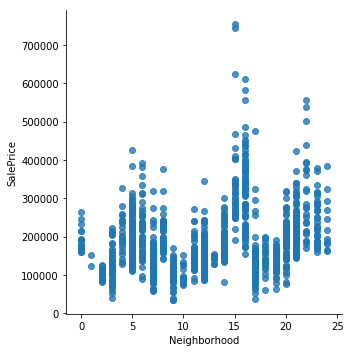

In [15]:
#Ames市域内の物理的な場所
sns.lmplot(x='Neighborhood',y='SalePrice',data=train,fit_reg=False)

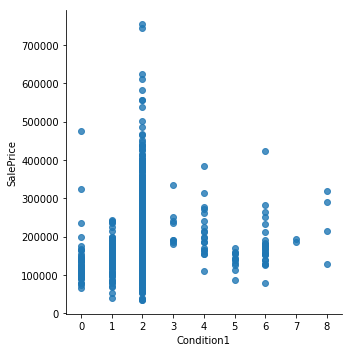

In [16]:
#幹線道路または鉄道への近接
sns.lmplot(x='Condition1',y='SalePrice',data=train,fit_reg=False)

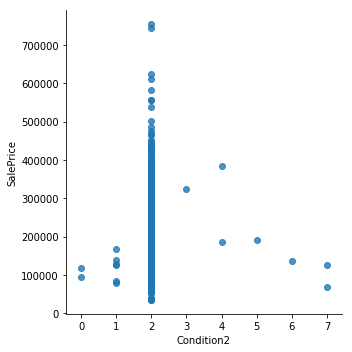

In [17]:
#幹線道路または鉄道への近さ（秒がある場合）
sns.lmplot(x='Condition2',y='SalePrice',data=train,fit_reg=False)

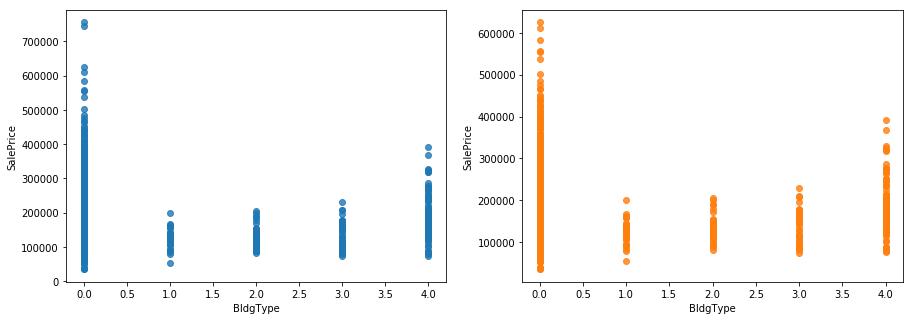

In [18]:
#住居の種類
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.regplot(x='BldgType',y='SalePrice',data=train,fit_reg=False,ax=ax[0])

#外れデータ除外
train = train.drop(train[(train['SalePrice']>700000)].index)
sns.regplot(x='BldgType',y='SalePrice',data=train,fit_reg=False,ax=ax[1])


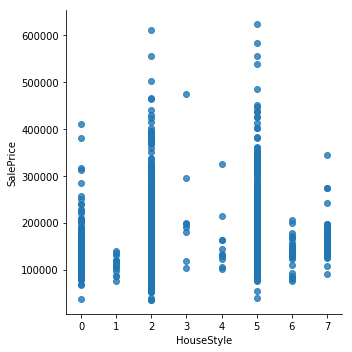

In [19]:
#住まいのスタイル
sns.lmplot(x='HouseStyle',y='SalePrice',data=train,fit_reg=False)

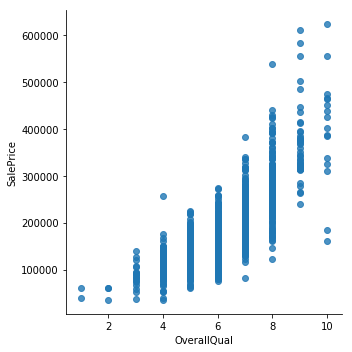

In [20]:
#全体的な素材と仕上げの品質
sns.lmplot(x='OverallQual',y='SalePrice',data=train,fit_reg=False)

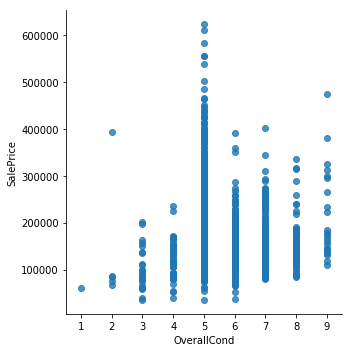

In [21]:
#全体的なコンディション評価
sns.lmplot(x='OverallCond',y='SalePrice',data=train,fit_reg=False)

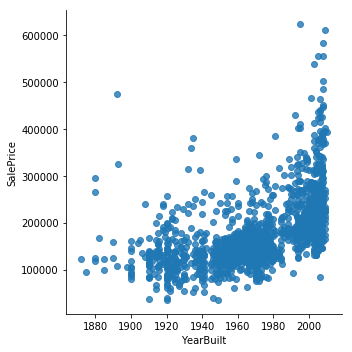

In [22]:
#元の建設日
sns.lmplot(x='YearBuilt',y='SalePrice',data=train,fit_reg=False)

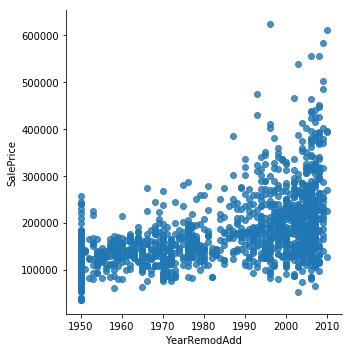

In [23]:
#改造日
sns.lmplot(x='YearRemodAdd',y='SalePrice',data=train,fit_reg=False)

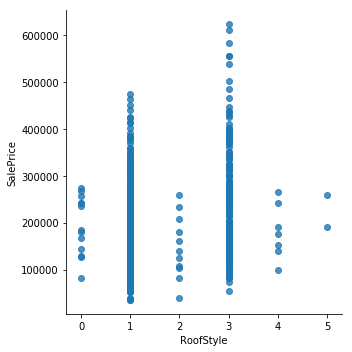

In [24]:
#屋根の種類
sns.lmplot(x='RoofStyle',y='SalePrice',data=train,fit_reg=False)

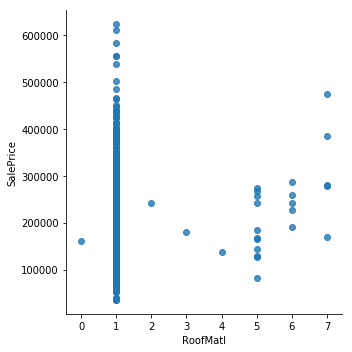

In [25]:
#屋根材
sns.lmplot(x='RoofMatl',y='SalePrice',data=train,fit_reg=False)

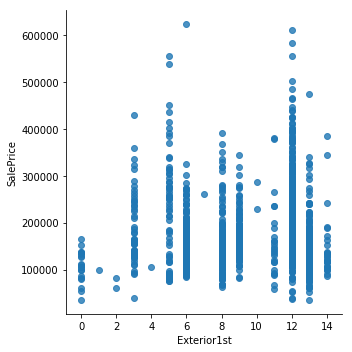

In [26]:
#家の外装
sns.lmplot(x='Exterior1st',y='SalePrice',data=train,fit_reg=False)

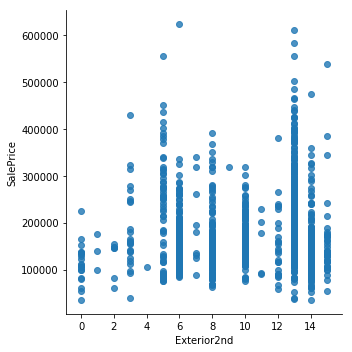

In [27]:
#家の外装材（複数の素材がある場合）
sns.lmplot(x='Exterior2nd',y='SalePrice',data=train,fit_reg=False)

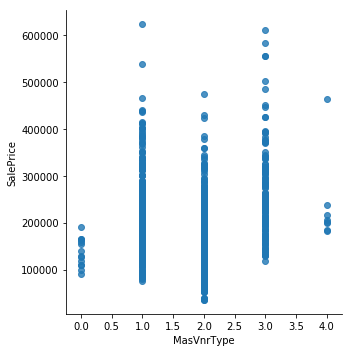

In [28]:
#石積みのベニヤタイプ
sns.lmplot(x='MasVnrType',y='SalePrice',data=train,fit_reg=False)

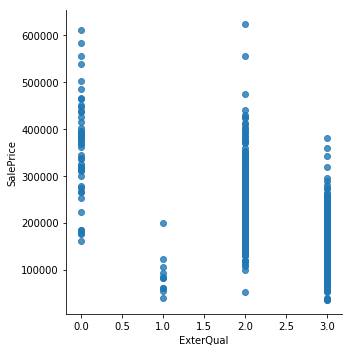

In [29]:
#外装材の品質
sns.lmplot(x='ExterQual',y='SalePrice',data=train,fit_reg=False)

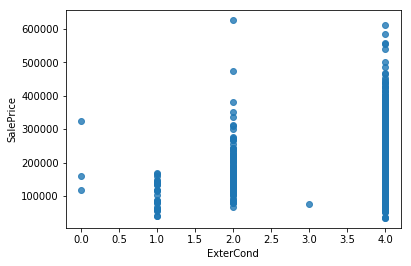

In [30]:
#外装上の材料の現状
sns.regplot(x='ExterCond',y='SalePrice',data=train,fit_reg=False)

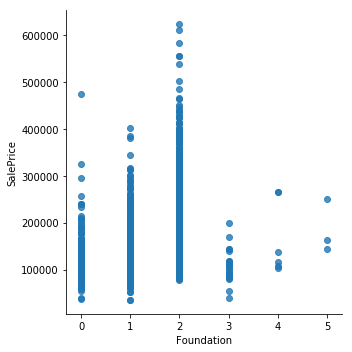

In [31]:
#財団の種類
sns.lmplot(x='Foundation',y='SalePrice',data=train,fit_reg=False)

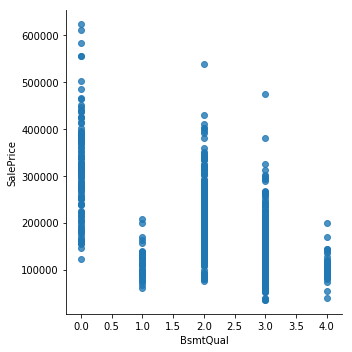

In [32]:
#地下室の高さ
sns.lmplot(x='BsmtQual',y='SalePrice',data=train,fit_reg=False)

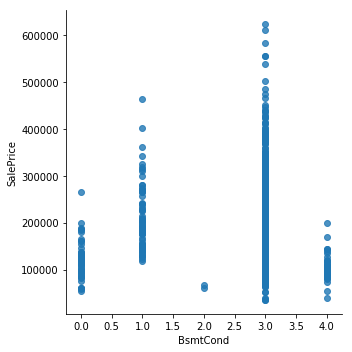

In [33]:
#地下室の概況
sns.lmplot(x='BsmtCond',y='SalePrice',data=train,fit_reg=False)

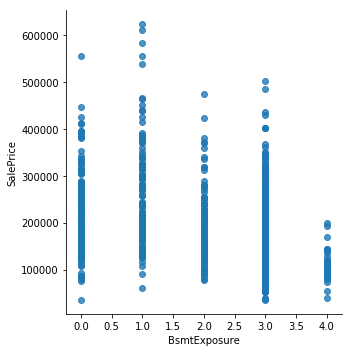

In [34]:
#ストライキまたは庭レベルの地下壁
sns.lmplot(x='BsmtExposure',y='SalePrice',data=train,fit_reg=False)

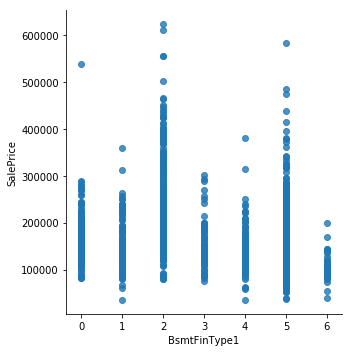

In [35]:
#地下室仕上がり面積
sns.lmplot(x='BsmtFinType1',y='SalePrice',data=train,fit_reg=False)

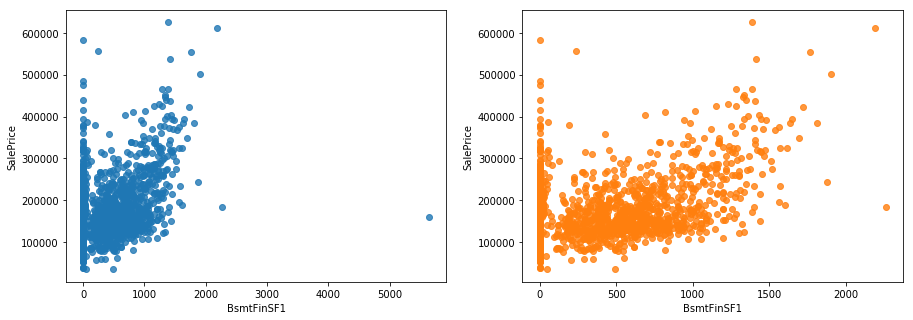

In [36]:
#タイプ1仕上げ平方フィート
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.regplot(x='BsmtFinSF1',y='SalePrice',data=train,fit_reg=False,ax=ax[0])

#外れデータ除外
train = train.drop(train[(train['BsmtFinSF1']>5000)].index)
sns.regplot(x='BsmtFinSF1',y='SalePrice',data=train,fit_reg=False,ax=ax[1])

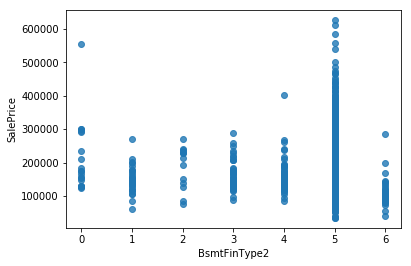

In [37]:
#2番目に完成した領域の品質（存在する場合）
sns.regplot(x='BsmtFinType2',y='SalePrice',data=train,fit_reg=False)

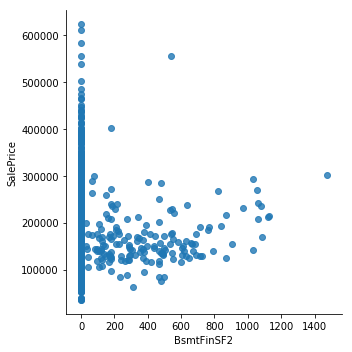

In [38]:
#タイプ2仕上げ平方フィート
sns.lmplot(x='BsmtFinSF2',y='SalePrice',data=train,fit_reg=False)

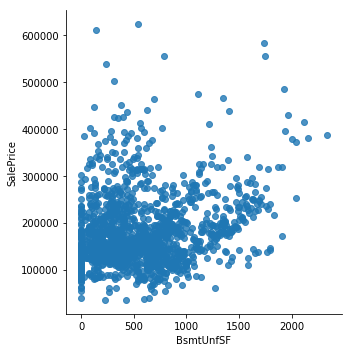

In [39]:
#地下1平方フィート
sns.lmplot(x='BsmtUnfSF',y='SalePrice',data=train,fit_reg=False)

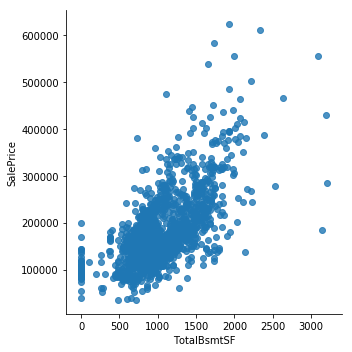

In [40]:
#地下室の総平方フィート
sns.lmplot(x='TotalBsmtSF',y='SalePrice',data=train,fit_reg=False)

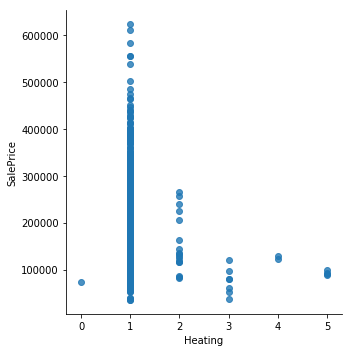

In [41]:
#暖房の種類
sns.lmplot(x='Heating',y='SalePrice',data=train,fit_reg=False)

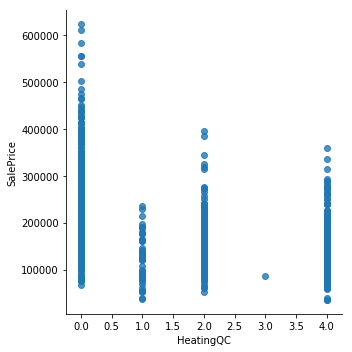

In [42]:
#暖房の品質と状態
sns.lmplot(x='HeatingQC',y='SalePrice',data=train,fit_reg=False)

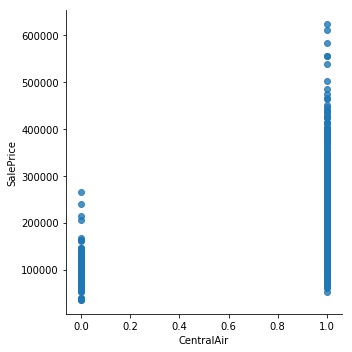

In [43]:
#セントラルエアコン
sns.lmplot(x='CentralAir',y='SalePrice',data=train,fit_reg=False)

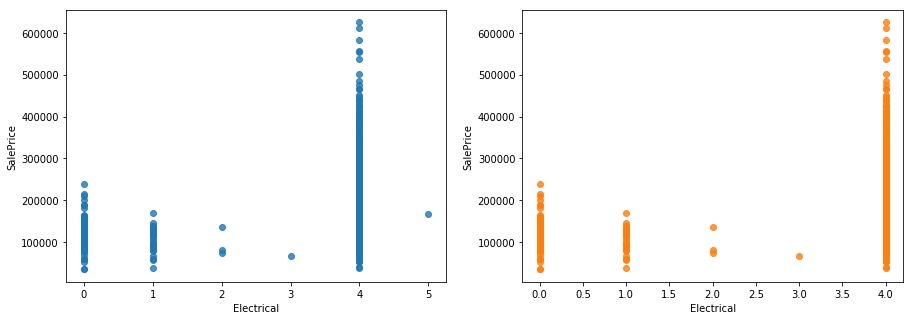

In [44]:
#電気システム
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.regplot(x='Electrical',y='SalePrice',data=train,fit_reg=False,ax=ax[0])

#外れデータ除外
train = train.drop(train[(train['Electrical']>4.5)].index)
sns.regplot(x='Electrical',y='SalePrice',data=train,fit_reg=False,ax=ax[1])

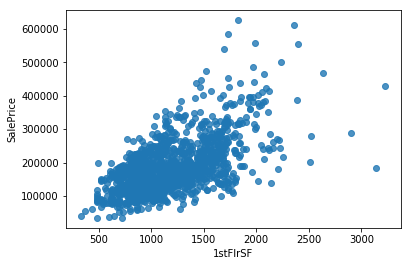

In [45]:
#1階平方フィート
sns.regplot(x='1stFlrSF',y='SalePrice',data=train,fit_reg=False)

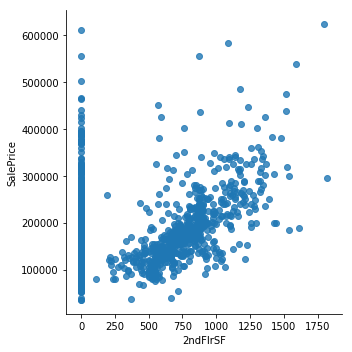

In [46]:
#2階平方フィート
sns.lmplot(x='2ndFlrSF',y='SalePrice',data=train,fit_reg=False)

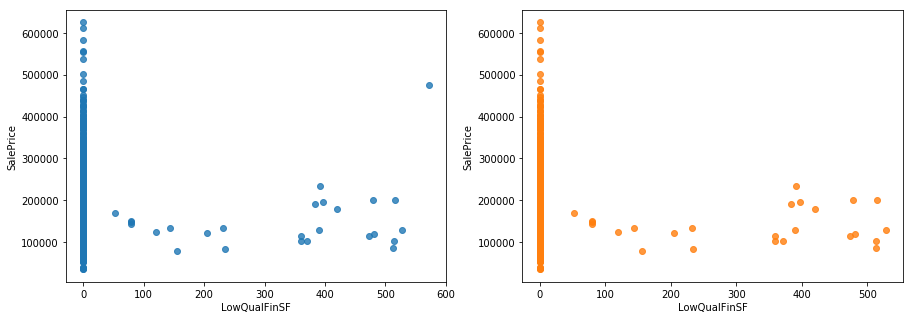

In [47]:
#低品質仕上げ平方フィート（全フロア）
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.regplot(x='LowQualFinSF',y='SalePrice',data=train,fit_reg=False,ax=ax[0])

#外れデータ除外
train = train.drop(train[(train['LowQualFinSF']>560)].index)
sns.regplot(x='LowQualFinSF',y='SalePrice',data=train,fit_reg=False,ax=ax[1])

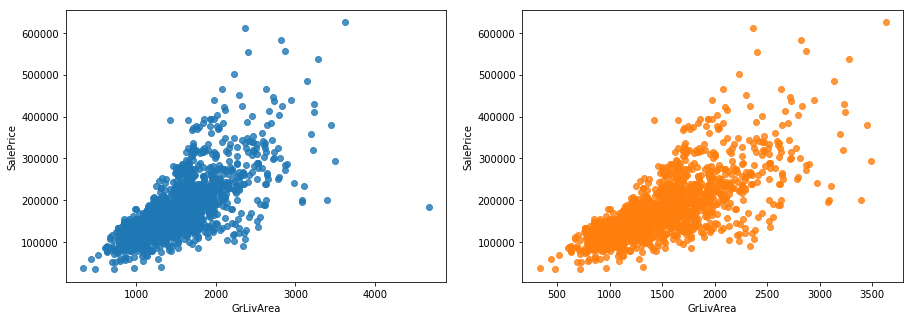

In [48]:
#上階（地面）のリビングエリア平方フィート
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.regplot(x='GrLivArea',y='SalePrice',data=train,fit_reg=False,ax=ax[0])

#外れデータ除外
train = train.drop(train[(train['GrLivArea']>4500)].index)
sns.regplot(x='GrLivArea',y='SalePrice',data=train,fit_reg=False,ax=ax[1])

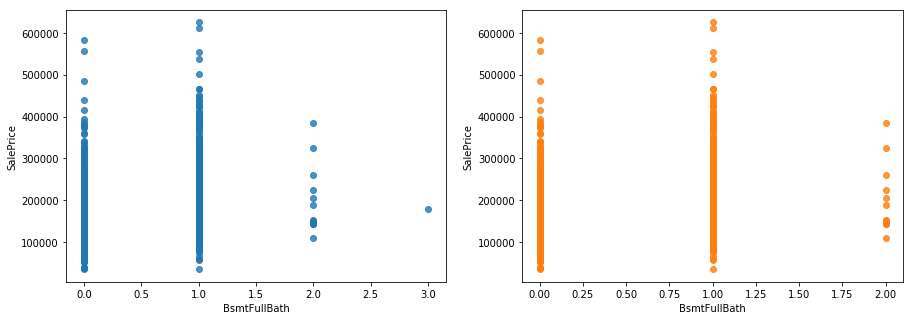

In [49]:
#地下フルバスルーム
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.regplot(x='BsmtFullBath',y='SalePrice',data=train,fit_reg=False,ax=ax[0])

#外れデータ除外
train = train.drop(train[(train['BsmtFullBath']>2.5)].index)
sns.regplot(x='BsmtFullBath',y='SalePrice',data=train,fit_reg=False,ax=ax[1])

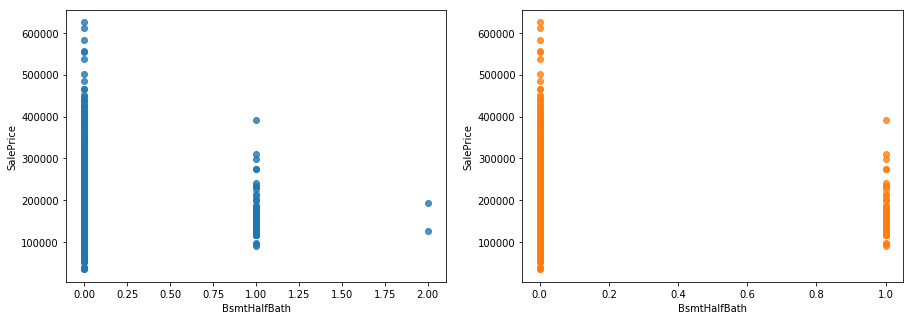

In [50]:
#地下ハーフバスルーム
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.regplot(x='BsmtHalfBath',y='SalePrice',data=train,fit_reg=False,ax=ax[0])

#外れデータ除外
train = train.drop(train[(train['BsmtHalfBath']>1.75)].index)
sns.regplot(x='BsmtHalfBath',y='SalePrice',data=train,fit_reg=False,ax=ax[1])

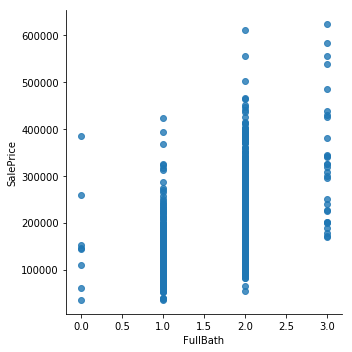

In [51]:
#グレード以上のフルバスルーム
sns.lmplot(x='FullBath',y='SalePrice',data=train,fit_reg=False)

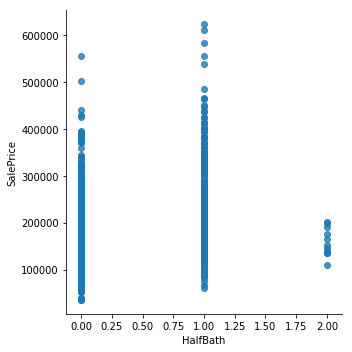

In [52]:
#グレード以上のハーフバス
sns.lmplot(x='HalfBath',y='SalePrice',data=train,fit_reg=False)

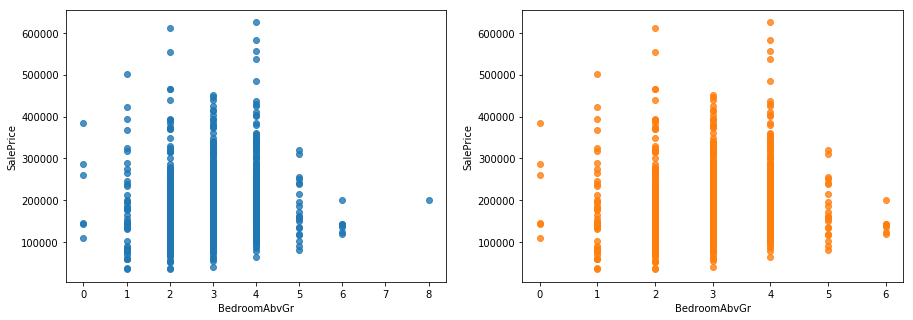

In [53]:
#地下室より上の寝室の数
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.regplot(x='BedroomAbvGr',y='SalePrice',data=train,fit_reg=False,ax=ax[0])

#外れデータ除外
train = train.drop(train[(train['BedroomAbvGr']>7)].index)
sns.regplot(x='BedroomAbvGr',y='SalePrice',data=train,fit_reg=False,ax=ax[1])

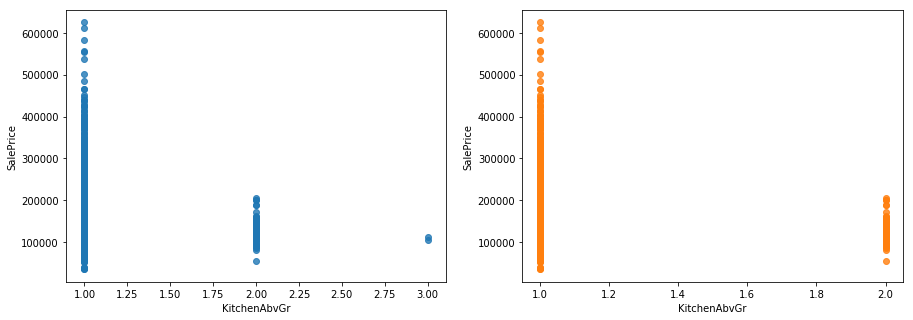

In [54]:
#キッチンの数
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.regplot(x='KitchenAbvGr',y='SalePrice',data=train,fit_reg=False,ax=ax[0])

#外れデータ除外
train = train.drop(train[(train['KitchenAbvGr']>2.75)].index)
sns.regplot(x='KitchenAbvGr',y='SalePrice',data=train,fit_reg=False,ax=ax[1])

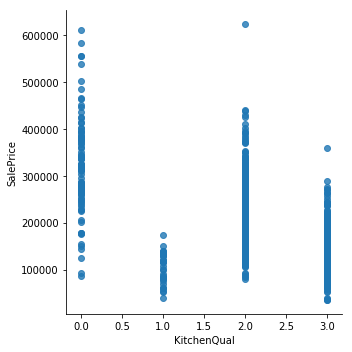

In [55]:
#キッチンの質
sns.lmplot(x='KitchenQual',y='SalePrice',data=train,fit_reg=False)

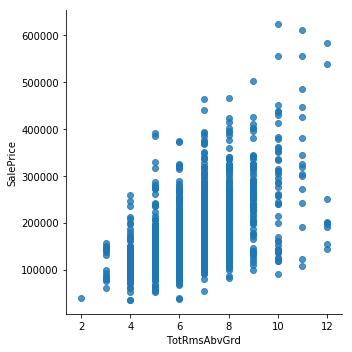

In [56]:
#グレード以上の総客室数（バスルームは含まれません）
sns.lmplot(x='TotRmsAbvGrd',y='SalePrice',data=train,fit_reg=False)

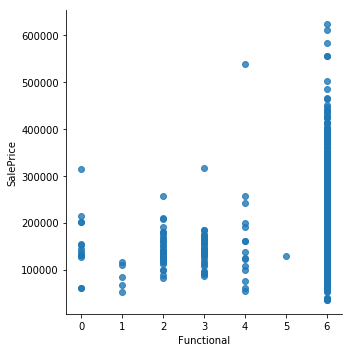

In [57]:
#家庭用機能性評価
sns.lmplot(x='Functional',y='SalePrice',data=train,fit_reg=False)

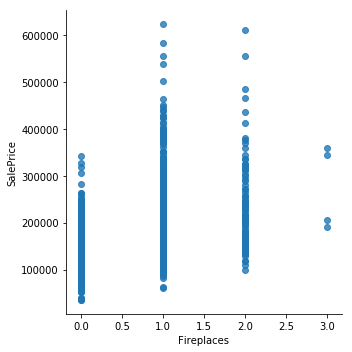

In [58]:
#暖炉の数
sns.lmplot(x='Fireplaces',y='SalePrice',data=train,fit_reg=False)

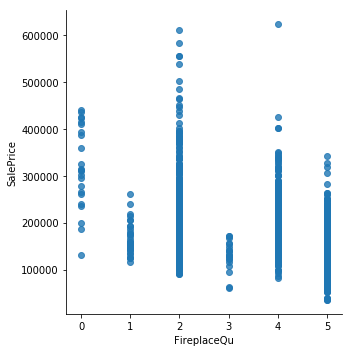

In [59]:
#暖炉の品質
sns.lmplot(x='FireplaceQu',y='SalePrice',data=train,fit_reg=False)

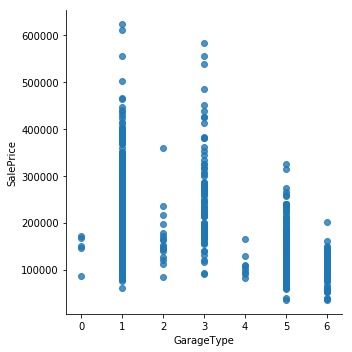

In [60]:
#ガレージの場所
sns.lmplot(x='GarageType',y='SalePrice',data=train,fit_reg=False)

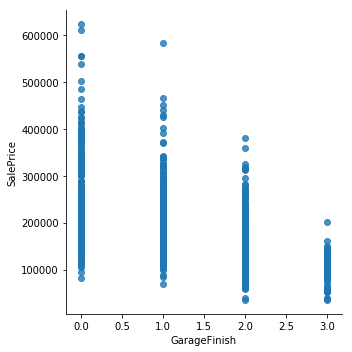

In [61]:
#ガレージの内部仕上げ
sns.lmplot(x='GarageFinish',y='SalePrice',data=train,fit_reg=False)

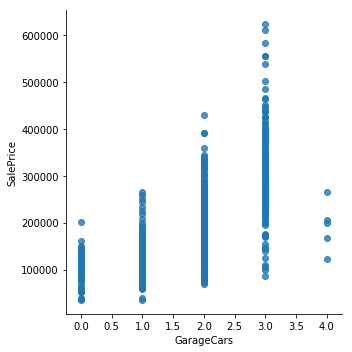

In [62]:
#自動車容量のガレージサイズ
sns.lmplot(x='GarageCars',y='SalePrice',data=train,fit_reg=False)

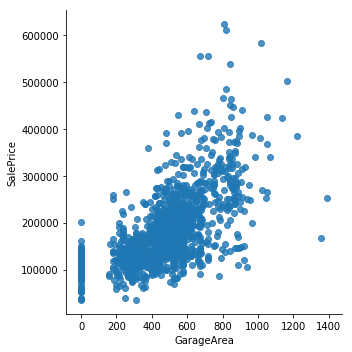

In [63]:
#ガレージサイズ（平方フィート）
sns.lmplot(x='GarageArea',y='SalePrice',data=train,fit_reg=False)

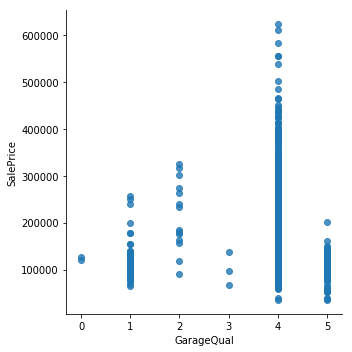

In [64]:
#ガレージ品質
sns.lmplot(x='GarageQual',y='SalePrice',data=train,fit_reg=False)

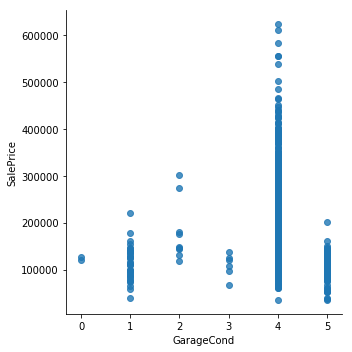

In [65]:
#ガレージ状態
sns.lmplot(x='GarageCond',y='SalePrice',data=train,fit_reg=False)

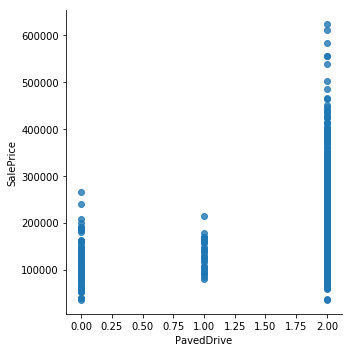

In [66]:
#舗装された私道
sns.lmplot(x='PavedDrive',y='SalePrice',data=train,fit_reg=False)

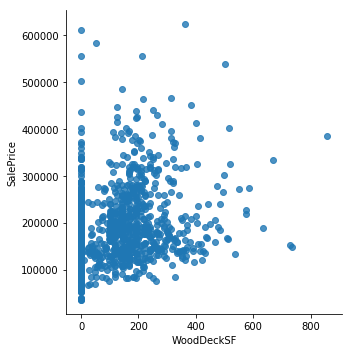

In [67]:
#ウッドデッキ面積（平方フィート）
sns.lmplot(x='WoodDeckSF',y='SalePrice',data=train,fit_reg=False)

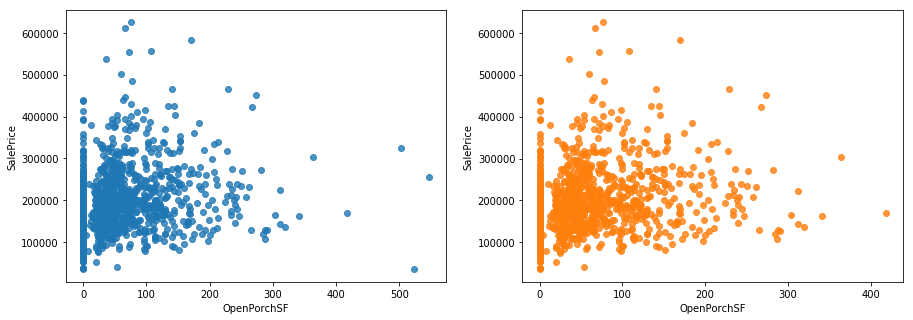

In [68]:
#オープンポーチ面積（平方フィート）
#住居の種類
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.regplot(x='OpenPorchSF',y='SalePrice',data=train,fit_reg=False,ax=ax[0])

#外れデータ除外
train = train.drop(train[(train['OpenPorchSF']>500)].index)
sns.regplot(x='OpenPorchSF',y='SalePrice',data=train,fit_reg=False,ax=ax[1])

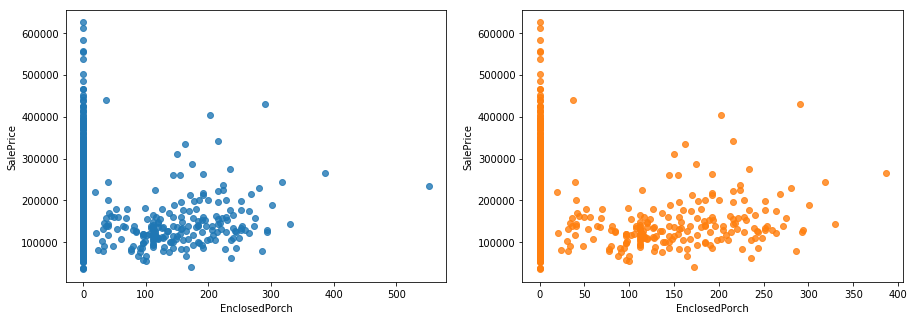

In [69]:
#囲まれたポーチの面積（平方フィート）
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.regplot(x='EnclosedPorch',y='SalePrice',data=train,fit_reg=False,ax=ax[0])

#外れデータ除外
train = train.drop(train[(train['EnclosedPorch']>500)].index)
sns.regplot(x='EnclosedPorch',y='SalePrice',data=train,fit_reg=False,ax=ax[1])



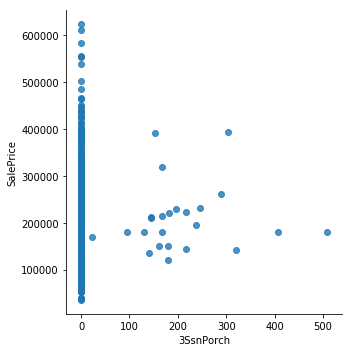

In [70]:
#3平方フィートの3シーズンポーチ面積
sns.lmplot(x='3SsnPorch',y='SalePrice',data=train,fit_reg=False)

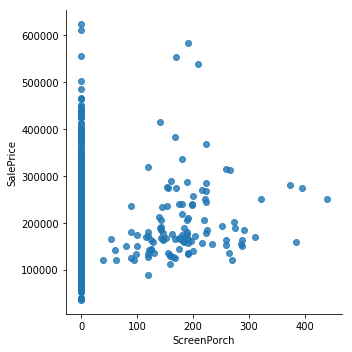

In [71]:
#スクリーンポーチの面積（平方フィート）
sns.lmplot(x='ScreenPorch',y='SalePrice',data=train,fit_reg=False)

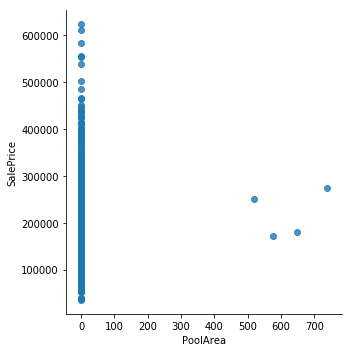

In [72]:
#プール面積（平方フィート）
sns.lmplot(x='PoolArea',y='SalePrice',data=train,fit_reg=False)

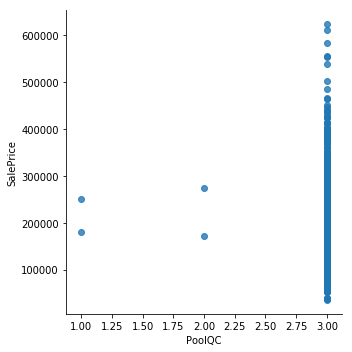

In [73]:
#プール品質
sns.lmplot(x='PoolQC',y='SalePrice',data=train,fit_reg=False)

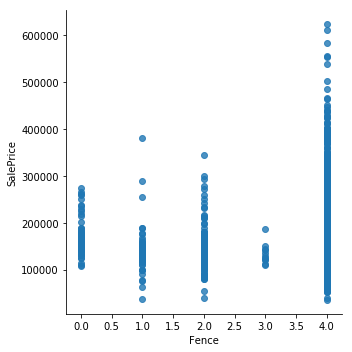

In [74]:
#フェンスの品質
sns.lmplot(x='Fence',y='SalePrice',data=train,fit_reg=False)

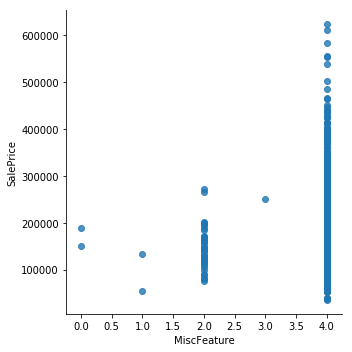

In [75]:
#その他の機能は、他のカテゴリに記載されていません
sns.lmplot(x='MiscFeature',y='SalePrice',data=train,fit_reg=False)

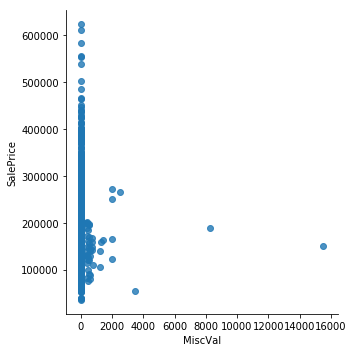

In [76]:
#その他の機能の価値
sns.lmplot(x='MiscVal',y='SalePrice',data=train,fit_reg=False)

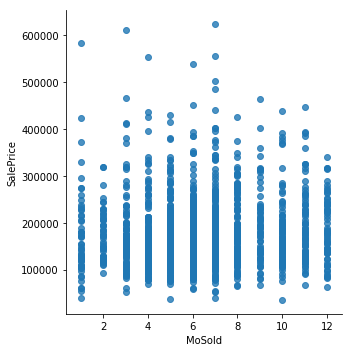

In [77]:
#月売れ
sns.lmplot(x='MoSold',y='SalePrice',data=train,fit_reg=False)

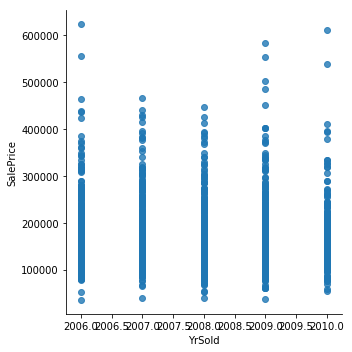

In [78]:
#年販売
sns.lmplot(x='YrSold',y='SalePrice',data=train,fit_reg=False)

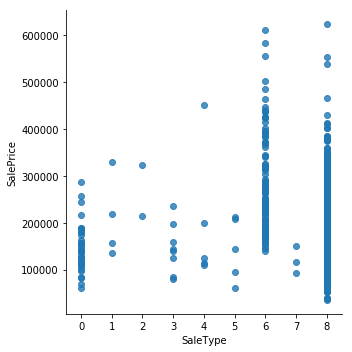

In [79]:
#販売の種類
sns.lmplot(x='SaleType',y='SalePrice',data=train,fit_reg=False)

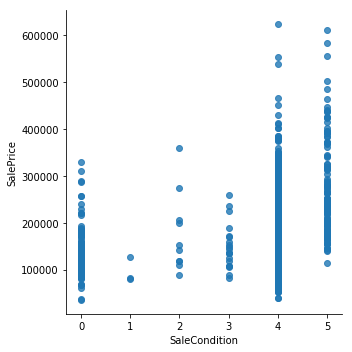

In [80]:
#販売条件
sns.lmplot(x='SaleCondition',y='SalePrice',data=train,fit_reg=False)

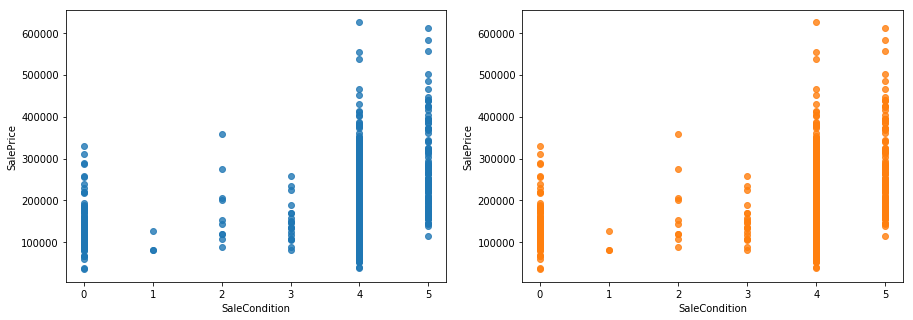

In [81]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.regplot(x='SaleCondition',y='SalePrice',data=train,fit_reg=False,ax=ax[0])

train = train.drop(train[(train['SaleCondition']>-1) & (train['SalePrice']>700000)].index)

sns.regplot(x='SaleCondition',y='SalePrice',data=train,fit_reg=False,ax=ax[1])

In [82]:
# データ分割
train_ID = train['Id']
test_ID = test['Id']

y_train = train['SalePrice']
X_train = train.drop(['Id','SalePrice'], axis=1)
X_test = test.drop('Id', axis=1)

#欠落データのチェック
pd.set_option('display.max_rows', 500)
#print(missingData_check(X_train,pd,"学習用データ"))
#print(missingData_check(X_test,pd,"予測用データ"))

In [83]:
#トレーニングデータとテストデータを結合
Xmat = pd.concat([X_train, X_test])

# 欠損が多いカラムを削除
Xmat = Xmat.drop(['LotFrontage','MasVnrArea','GarageYrBlt'], axis=1)

#販売価格のばらつきが顕著でないものは除外
Xmat = Xmat.drop(['LotShape','LotConfig','BsmtFinSF1','3SsnPorch','ScreenPorch','PoolArea','PoolQC','MoSold','YrSold'], axis=1)

#Xmat = Xmat.drop(['MSSubClass','MSZoning','Street','LandContour','Utilities','LandSlope','Neighborhood','Condition1','BldgType','HouseStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','CentralAir','Electrical','LowQualFinSF','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','KitchenQual','Functional','Fireplaces','FireplaceQu','GarageType','GarageQual','GarageCond','PavedDrive','Fence','MiscFeature','MiscVal','SaleType','SaleCondition','SaleCondition'], axis=1)




# 欠損値の少ないカラムのNaNは中央値(median)で埋める
Xmat = Xmat.fillna(Xmat.median())

# 対数計算を実施
# 数字のばらつき、偏りを小さくする
y_train = np.log(y_train)

# trainデータとtestデータを含んでいるXmatを、再度trainデータとtestデータに分割
X_train = Xmat.iloc[:train.shape[0],:]
X_test = Xmat.iloc[train.shape[0]:,:]

#欠落データのチェック
pd.set_option('display.max_rows', 500)
#print(missingData_check(X_train,pd,"学習用データ"))
#print(missingData_check(X_test,pd,"予測用データ"))

In [84]:
'''
from sklearn.model_selection import StratifiedKFold,ParameterGrid
from sklearn.model_selection import train_test_split


#クロスバリデーション
list_logloss_score = []
list_auc_score = []

i=0
while i < 5:
    X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(X_train, y_train, test_size=0.4, random_state=0)

    # 線形回帰(Linear Regression)
    slr = LinearRegression()

    # fit関数で学習開始
    slr.fit(X_train_cv,y_train_cv)

    print(i)
    i += 1

    
# クロスバリデーションを実行
print(slr.score(X_test_cv, y_test_cv))
'''

'\nfrom sklearn.model_selection import StratifiedKFold,ParameterGrid\nfrom sklearn.model_selection import train_test_split\n\n\n#クロスバリデーション\nlist_logloss_score = []\nlist_auc_score = []\n\ni=0\nwhile i < 5:\n    X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(X_train, y_train, test_size=0.4, random_state=0)\n\n    # 線形回帰(Linear Regression)\n    slr = LinearRegression()\n\n    # fit関数で学習開始\n    slr.fit(X_train_cv,y_train_cv)\n\n    print(i)\n    i += 1\n\n    \n# クロスバリデーションを実行\nprint(slr.score(X_test_cv, y_test_cv))\n'

In [85]:
# 線形回帰(Linear Regression)
slr = LinearRegression()

# fit関数で学習開始
slr.fit(X_train,y_train)

# 偏回帰係数(回帰分析において得られる回帰方程式の各説明変数の係数)を出力
print('傾き：{0}'.format(slr.coef_[0]))

# y切片(直線とy軸との交点)を出力
print('y切片: {0}'.format(slr.intercept_))

#パラメータの取得
print('パラメータ: {0}'.format(slr.get_params()))  
#決定係数の表示
print('決定係数score: {0}'.format(slr.score(X_train,y_train)))  

傾き：-8.880991163660142e-05
y切片: 6.04725893245307
パラメータ: {'n_jobs': None, 'copy_X': True, 'normalize': False, 'fit_intercept': True}
決定係数score: 0.9194097286064206


In [86]:
# 偏回帰係数はscikit-learnのcoefで取得
print('傾き：{0}'.format(slr.coef_[0]))

# y切片(直線とy軸との交点)を出力
# 余談：x切片もあり、それは直線とx軸との交点を指す
print('y切片: {0}'.format(slr.intercept_))

y_test_pred = np.exp(slr.predict(X_test))

submission = pd.DataFrame({
    "Id": test_ID,
    "SalePrice": y_test_pred
})
submission.to_csv('gs://sample_machine_learning_output/HousePrices/hp_submission2.csv', index=False)

#Score : 0.12582

傾き：-8.880991163660142e-05
y切片: 6.04725893245307
